# Question: 1) How many male / female survived / died from the ship with respect to different Pclass (First class, Second class, Third class)?

### IMPORTING THE DATASET OF TITANIC DATA AND CREATING THE DATAFRAME

This is first question of this project. Here I will be finding out the number of male / female survied / died form three different Pclass. I have analysed the data with bar chart and pie chart. For this question I have not did data wrangling. Data is as it is taken for further analysis. 

In [1]:
# Descriptive labelling Step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic_df = pd.read_csv('Titanic.csv')

titanic_df['Survival'] = titanic_df.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic_df['Class'] = titanic_df.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
# Printing dataframe
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,Third Class
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Died,Third Class
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Died,First Class
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Died,Third Class
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Survived,Third Class
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Survived,Second Class



Here I have used pandas librery for creating the dataframe. With the help of '.map' I have labelled of two columns values to new names and then printed the dataframe

In [2]:
survived = titanic_df.groupby(['Survival'])['Survived'].value_counts()
print('Total number of passengers Survived / Died')
survived

Total number of passengers Survived / Died


Survival  Survived
Died      0           549
Survived  1           342
Name: Survived, dtype: int64

By using groupby function I came to know that out of 891 passengers only 342 survived, while 549 died

In [3]:
survival_class = titanic_df.groupby(['Class'])['Survival'].value_counts()
print('Number of survivals with respect to class')
survival_class

Number of survivals with respect to class


Class         Survival
First Class   Survived    136
              Died         80
Second Class  Died         97
              Survived     87
Third Class   Died        372
              Survived    119
Name: Survival, dtype: int64

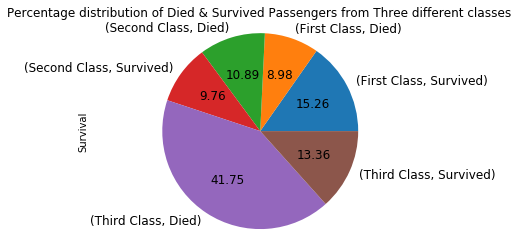

In [5]:
df = pd.Series(survival_class.plot.pie(autopct='%.2f', fontsize='12'))

plt.title('Percentage distribution of Died & Survived Passengers from Three different classes')
plt.axis('equal')
plt.show()


By groupby I have segregated the total number of servivals and died with respect to three different classes. Also I have ploted the pie chart for percentage distribution of survived and died from three different classes. 

Here I found that, percentagewise more passengers died in third class campare to other two classes. Also it can be concluded that more passengers get survived from first class

In [6]:
def percentage(value):
    return (value/float(value[-1]))*100
gender_survivals = pd.crosstab([titanic_df.Sex], titanic_df.Survival, margins=True).apply(percentage, axis=1)
gender_survivals

Survival,Died,Survived,All
Sex,,,
female,25.796178,74.203822,100.0
male,81.109185,18.890815,100.0
All,61.616162,38.383838,100.0



Here we can say that, 61.61 percent passenger died while only 38.38 percent survived. For total number of female 74.20 percent female survived. Only 18.89 percent of the male survived from the ship.

In [7]:
class_gender_survivals = pd.crosstab([titanic_df.Class,titanic_df.Sex], titanic_df.Survival)
class_gender_survivals

Survival             Died  Survived
Class        Sex                   
First Class  female     3        91
             male      77        45
Second Class female     6        70
             male      91        17
Third Class  female    72        72
             male     300        47

Here I have used crosstab, in order to segregate data based on class, sex, and number of servival. I have plotted bar chart for the same. 

Distribution of fare according to classes 1, 2 and 3


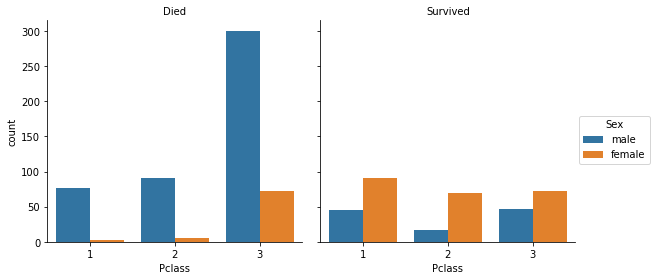

In [8]:
import seaborn as sns

g = sns.factorplot(x='Pclass', hue='Sex', col='Survival', data=titanic_df, kind='count')
print('Distribution of fare according to classes 1, 2 and 3')
g.set_titles(col_template='{col_name}')
plt.show()

### Conclusion - Question 1

Here I found that, for the first class 91 female survived while, 3 died. For the second class 70 survived and only 6 died. But for third class it is 50-50. It may be concluded that, more female from first class survived when compared to rest two. We can say that, female which are in first class may be from rich and prestigious family. Hence their survival rate is more.
While analysing male data, 45 male survuved while 77 died in first class. For the second class out of 108 only 17 survived. In the third class only 47 male survived out of 347. So, it can be concluded that, for each class number of male survied from respective class are vary less compared total number of male in that class. The reason behind this may be, preference may be given to female during rescue.
Also male from first class get more prefernce while rescuing hence their survival rate is more when compared to second and third class. As male from the first class may be from rich and prestigious family.